In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [5]:
files = os.listdir('Metrics/')
files = [int(f.split(".")[0]) for f in files]
files

[1,
 14,
 15,
 16,
 19,
 2,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 35,
 38,
 4,
 40,
 42,
 43,
 44,
 46,
 49,
 51,
 53,
 58,
 6,
 61,
 63,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 73,
 77,
 8]

In [9]:
group3 = {"low" : [55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64, 54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62],
            "medium" : [16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14, 37, 46, 39, 49, 22, 7, 77, 3, 40],
            "high" : [66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32]
            }

# check how many of the files fall into each group
low = 0
medium = 0
high = 0

for f in files:
    if f in group3["low"]:
        low += 1
    elif f in group3["medium"]:
        medium += 1
    elif f in group3["high"]:
        high += 1

print("Low: ", low)
print("Medium: ", medium)
print("High: ", high)

Low:  4
Medium:  19
High:  20


In [10]:
group5 = {"very_low" : [55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64],
            "low" : [54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62],
            "medium" : [16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14],
            "high" : [37, 46, 39, 49, 22, 7, 77, 3, 40],
            "very_high" : [66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32]
            }

# check how many of the files fall into each group
very_low = 0
low = 0
medium = 0
high = 0
very_high = 0

for f in files:
    if f in group5["very_low"]:
        very_low += 1
    elif f in group5["low"]:
        low += 1
    elif f in group5["medium"]:
        medium += 1
    elif f in group5["high"]:
        high += 1
    elif f in group5["very_high"]:
        very_high += 1

print("Very Low: ", very_low)
print("Low: ", low)
print("Medium: ", medium)
print("High: ", high)
print("Very High: ", very_high)

Very Low:  1
Low:  3
Medium:  12
High:  7
Very High:  20


In [17]:
# initialize an array with -1 for size 77
# this will be used to store the metrics for each file
stshn_mae = np.full((77), -1.0)
stshn_mse = np.full((77), -1.0)

# load the metrics for each file
for f in files:
    with open('Metrics/' + str(f) + '.txt') as file:
        lines = file.readlines()
        lines = lines[0].split(" ")
        stshn_mae[f-1] = float(lines[0])
        stshn_mse[f-1] = float(lines[1]) * float(lines[1])

print(stshn_mae)
print(stshn_mse)

[ 0.32841744  0.79615083  0.38094827  1.66222422 -1.          0.53894678
  0.46915076  0.84810562 -1.         -1.         -1.         -1.
 -1.          0.63216623  0.42125288  1.02957843 -1.         -1.
  0.56252497 -1.          0.99557728  0.56847381 -1.          0.6745708
  0.52842548  0.72821154  0.35006806  0.79764644  0.92955836  0.52887645
  0.88001534  0.76255226 -1.         -1.          0.65562333 -1.
 -1.          0.6813939  -1.          1.11081026 -1.          0.75652537
  0.79794134  0.52727384 -1.          0.67871676 -1.         -1.
  0.74819635 -1.          1.00086979 -1.          0.53801544 -1.
 -1.         -1.         -1.          0.55244637 -1.         -1.
  0.65606526 -1.          0.86846728 -1.         -1.          0.83546356
  0.71388332  0.76891209  0.37528224  0.39570477  0.63414728 -1.
  0.53051819 -1.         -1.         -1.          0.47387905]
[ 0.17665072  0.91789315  0.13579931 12.29344557 -1.          0.54838536
  0.15670675  1.68883753 -1.         -1.      

In [18]:
with open("stshn_mae.pkl", "wb") as f:
    pickle.dump(stshn_mae, f)

with open("stshn_mse.pkl", "wb") as f:
    pickle.dump(stshn_mse, f)

# Analysis

In [2]:
stshn_mae = pickle.load(open("stshn_mae.pkl", "rb"))
stshn_mse = pickle.load(open("stshn_mse.pkl", "rb"))

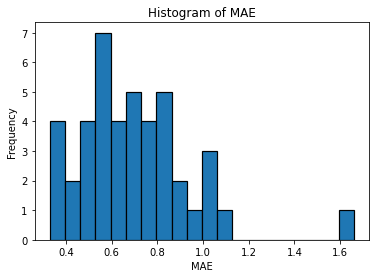

In [3]:
temp_stshn_mae = stshn_mae[stshn_mae != -1.0]

with open("Analysis ST-SHN_MAE.txt", "w") as f:
    f.write("Min: " + str(np.min(temp_stshn_mae)) + "\n")
    f.write("Max: " + str(np.max(temp_stshn_mae)) + "\n")
    f.write("Mean: " + str(np.mean(temp_stshn_mae)) + "\n")
    f.write("Variance: " + str(np.var(temp_stshn_mae)) + "\n")

# plot histogram
plt.hist(temp_stshn_mae, bins=20, edgecolor="black", linewidth=1.2)
plt.title("Histogram of MAE")
plt.xlabel("MAE")
plt.ylabel("Frequency")
plt.savefig("ST-HSL MAE Histogram.jpg", bbox_inches="tight")
plt.show()

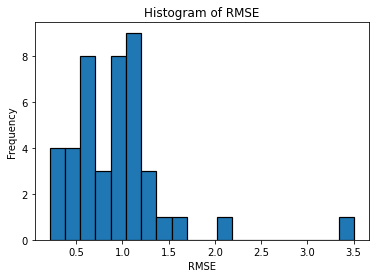

In [4]:
temp_stshn_mse = stshn_mse[stshn_mse != -1.0]

with open("Analysis ST-SHN_RMSE.txt", "w") as f:
    f.write("Min: " + str(np.min(temp_stshn_mse**0.5)) + "\n")
    f.write("Max: " + str(np.max(temp_stshn_mse**0.5)) + "\n")
    f.write("Mean: " + str(np.mean(temp_stshn_mse**0.5)) + "\n")
    f.write("Variance: " + str(np.var(temp_stshn_mse**0.5)) + "\n")

# plot histogram
plt.hist(temp_stshn_mse**0.5, bins=20, edgecolor="black", linewidth=1.2)
plt.title("Histogram of RMSE")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.savefig("ST-HSL RMSE Histogram.jpg", bbox_inches="tight")
plt.show()